**Importing Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\6.overlap.csv",header=None)

In [3]:
df.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<AxesSubplot:xlabel='0', ylabel='1'>

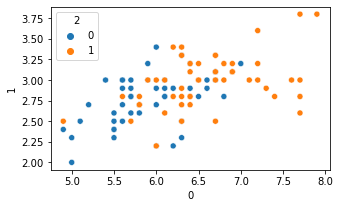

In [5]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = df[0], y = df[1], hue = df[2])

**Splitting train and test data**

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.8)

In [7]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(80, 2) (80,)
(20, 2) (20,)


**Standardizing the train data**

In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [9]:
std_train=std.fit_transform(x_train)

In [10]:
std_train

array([[ 0.17821246,  0.73001369],
       [ 0.90561023,  1.03738788],
       [-0.54918532,  1.03738788],
       [ 2.06944668, -0.19210887],
       [ 0.61465112,  0.73001369],
       [ 0.17821246,  0.11526532],
       [-0.54918532,  0.4226395 ],
       [ 2.36040579,  2.88163299],
       [ 2.06944668,  0.4226395 ],
       [ 1.3420489 ,  0.4226395 ],
       [-0.40370577,  0.4226395 ],
       [ 0.61465112, -1.11423142],
       [-0.11274666,  1.65213625],
       [ 1.05108979,  1.03738788],
       [ 0.0327329 ,  1.34476206],
       [-1.13110355, -1.42160561],
       [-1.13110355, -0.80685724],
       [-0.84014443,  0.4226395 ],
       [-1.85850132, -2.65110235],
       [ 1.92396712,  0.4226395 ],
       [ 1.48752846,  0.11526532],
       [-0.69466488, -0.49948305],
       [-0.40370577,  0.11526532],
       [-0.11274666, -2.03635398],
       [-2.00398088, -1.42160561],
       [ 0.32369201, -0.19210887],
       [-1.71302177, -1.11423142],
       [-0.25822621, -0.19210887],
       [ 2.06944668,

**Creating Dense layers**

In [11]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()
model.add(Dense(8, activation = 'relu', input_dim = 2,kernel_initializer='he_uniform'))
model.add(Dense(6, activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(4, activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 24        
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [17]:
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

**Fitting**

In [47]:
save=model.fit(x_train,y_train,batch_size=10,epochs=800,verbose=1,validation_split=0.2)

Epoch 1/800
7/7 [==============================] - 0s 17ms/step - loss: 0.4241 - accuracy: 0.7344 - val_loss: 1.0568 - val_accuracy: 0.3125
Epoch 2/800
7/7 [==============================] - 0s 7ms/step - loss: 0.4156 - accuracy: 0.7344 - val_loss: 0.9819 - val_accuracy: 0.5000
Epoch 3/800
7/7 [==============================] - 0s 8ms/step - loss: 0.4153 - accuracy: 0.7812 - val_loss: 0.9838 - val_accuracy: 0.5000
Epoch 4/800
7/7 [==============================] - 0s 7ms/step - loss: 0.4137 - accuracy: 0.7500 - val_loss: 1.0377 - val_accuracy: 0.3750
Epoch 5/800
7/7 [==============================] - 0s 7ms/step - loss: 0.4157 - accuracy: 0.7500 - val_loss: 1.0499 - val_accuracy: 0.3125
Epoch 6/800
7/7 [==============================] - 0s 7ms/step - loss: 0.4137 - accuracy: 0.7344 - val_loss: 1.0235 - val_accuracy: 0.3750
Epoch 7/800
7/7 [==============================] - 0s 7ms/step - loss: 0.4393 - accuracy: 0.7500 - val_loss: 0.9478 - val_accuracy: 0.5625
Epoch 8/800
7/7 [=========

In [48]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

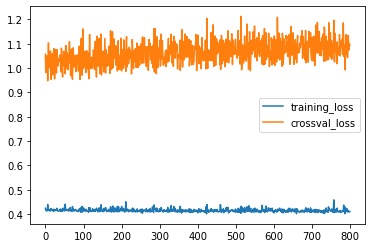

In [49]:
plt.plot(tl,label="training_loss")
plt.plot(cvl,label="crossval_loss")
plt.legend()

In [50]:
pred_train = model.predict(x_train)

3/3 [==============================] - 0s 4ms/step


In [51]:
pred_train

array([[0.51908255],
       [0.76337415],
       [0.47497332],
       [0.9919771 ],
       [0.612494  ],
       [0.40749794],
       [0.265314  ],
       [0.9945013 ],
       [0.9904206 ],
       [0.9327217 ],
       [0.2908245 ],
       [0.8423764 ],
       [0.7684499 ],
       [0.80268717],
       [0.7042374 ],
       [0.05045198],
       [0.03365498],
       [0.21877477],
       [0.0163119 ],
       [0.98575026],
       [0.9623961 ],
       [0.0860371 ],
       [0.20578073],
       [0.5745326 ],
       [0.00911586],
       [0.5594004 ],
       [0.01297676],
       [0.20283557],
       [0.99239284],
       [0.19782142],
       [0.31772628],
       [0.99292046],
       [0.1348043 ],
       [0.00916994],
       [0.6502246 ],
       [0.60572493],
       [0.7707456 ],
       [0.79837084],
       [0.90268505],
       [0.06158533],
       [0.04124275],
       [0.612494  ],
       [0.31514683],
       [0.1005476 ],
       [0.37675917],
       [0.9792727 ],
       [0.7396445 ],
       [0.250

In [52]:
import numpy as np
train_pred = np.where(pred_train<0.5,0,1)

In [53]:
train_pred.shape

(80, 1)

In [54]:
y_pred = train_pred.flatten()

In [55]:
y_pred.shape

(80,)

<AxesSubplot:xlabel='0', ylabel='1'>

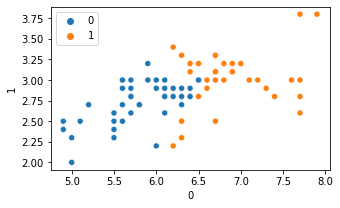

In [56]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_pred)

<AxesSubplot:xlabel='0', ylabel='1'>

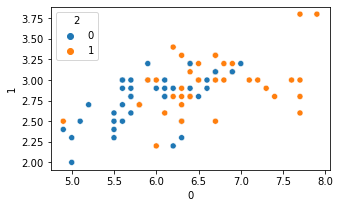

In [57]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

In [58]:
from mlxtend.plotting import plot_decision_regions

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

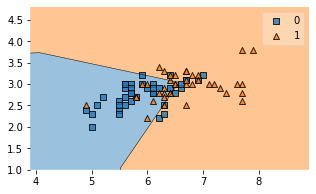

In [59]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

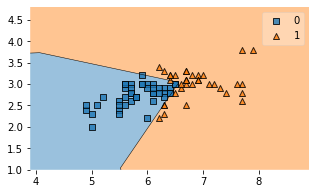

In [60]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_pred.astype(int),clf=model)

In [61]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)

0.675